In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [19]:
df = pd.read_csv("Result_final_3.csv")

In [20]:
df.head()

,Unnamed: 0,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [21]:
df.iloc[0]

Unnamed: 0                                         0
MandatId                                        9049
DateCreation                              2015-03-30
BienMandatId                                   24579
Statut                                             1
DescriptionBien_DateOffreAcceptee         0001-01-01
Origine_DateCollecte                      0001-01-01
CritereId                                       9051
SurfaceMin                                        30
NombrePiecesEnum                                   2
NombreChambresEnum                                 1
Departement_LocalisationId                       121
Region_LocalisationId                             27
LocalisationId                                   129
StatutMandat                                       9
TypeMission                                        2
TypeBien                                           2
TypeProjet                                         0
BudgetMaxEuro                                 

In [22]:
test = df.loc[df["CodePostal"] == 33310]
#z  = test.loc[test["BudgetMaxEuro"] == 220000]
test

,Unnamed: 0,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
300593,354101,7117,2014-10-13,18381,1,0001-01-01,0001-01-01,7117,65,4,...,9,1,1,1,172000,33310,Lormont,Gironde,Aquitaine,0
300594,354102,7117,2014-10-13,18382,0,0001-01-01,2014-10-17,7117,65,4,...,9,1,1,1,172000,33310,Lormont,Gironde,Aquitaine,0
300595,354103,7117,2014-10-13,18383,1,0001-01-01,0001-01-01,7117,65,4,...,9,1,1,1,172000,33310,Lormont,Gironde,Aquitaine,0
300596,354104,7117,2014-10-13,18384,1,0001-01-01,0001-01-01,7117,65,4,...,9,1,1,1,172000,33310,Lormont,Gironde,Aquitaine,0
300597,354105,7117,2014-10-13,18385,1,0001-01-01,0001-01-01,7117,65,4,...,9,1,1,1,172000,33310,Lormont,Gironde,Aquitaine,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301202,354710,86703,2021-11-03,462279,0,0001-01-01,2021-12-10,87522,95,6,...,7,2,2,0,330000,33310,Lormont,Gironde,Aquitaine,1
301203,354711,86703,2021-11-03,463151,0,0001-01-01,2021-12-14,87522,95,6,...,7,2,2,0,330000,33310,Lormont,Gironde,Aquitaine,1
301204,354712,86703,2021-11-03,464093,0,2021-12-21,0001-01-01,87522,95,6,...,7,2,2,0,330000,33310,Lormont,Gironde,Aquitaine,1
301205,354713,86703,2021-11-03,464094,0,0001-01-01,0001-01-01,87522,95,6,...,7,2,2,0,330000,33310,Lormont,Gironde,Aquitaine,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 24 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Unnamed: 0                         int64 
 1   MandatId                           int64 
 2   DateCreation                       object
 3   BienMandatId                       int64 
 4   Statut                             int64 
 5   DescriptionBien_DateOffreAcceptee  object
 6   Origine_DateCollecte               object
 7   CritereId                          int64 
 8   SurfaceMin                         int64 
 9   NombrePiecesEnum                   int64 
 10  NombreChambresEnum                 int64 
 11  Departement_LocalisationId         int64 
 12  Region_LocalisationId              int64 
 13  LocalisationId                     int64 
 14  StatutMandat                       int64 
 15  TypeMission                        int64 
 16  TypeBien                           i

In [24]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [25]:
X = df[["BudgetMaxEuro", 'SurfaceMin','NombrePiecesEnum',
       'NombreChambresEnum',
       'TypeMission', 'TypeBien', 'TypeProjet',
       'CodePostal']]

In [26]:
X

,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,CodePostal
0,250000,30,2,1,2,2,0,1000
1,250000,30,2,1,2,2,0,1000
2,250000,30,2,1,2,2,0,1000
3,250000,30,2,1,2,2,0,1000
4,250000,30,2,1,2,2,0,1000
...,...,...,...,...,...,...,...,...
1743252,390000,90,3,2,2,1,1,6530
1743253,390000,90,3,2,2,1,1,6530
1743254,390000,90,3,2,2,1,1,6530
1743255,390000,90,3,2,2,1,1,6530


In [27]:
y = df['Succes']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:

SurfaceMin	NombrePiecesEnum	NombreChambresEnum	TypeMission	TypeBien	TypeProjet	Budget	CodePostal
0	80	2	2	1	1	1	220000	33310

SyntaxError: invalid syntax (Temp/ipykernel_20308/242530017.py, line 1)

In [30]:
X_train

,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,CodePostal
480364,350000,150,6,6,1,8,0,42000
796022,900000,165,5,4,2,1,1,69130
862319,400000,100,4,3,2,1,1,69330
1173577,160000,10,1,0,2,5,2,75011
1457827,600000,120,5,4,2,1,1,84240
...,...,...,...,...,...,...,...,...
259178,185000,30,2,1,2,2,1,31000
1414414,250000,60,3,2,2,2,1,78360
131932,270000,55,2,1,2,2,1,13009
671155,350000,53,3,2,2,2,1,69004


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[-0.21566038,  1.31810816,  2.19936814, ...,  2.97837599,
        -1.83259956, -0.74321526],
       [ 1.15848523,  1.57078119,  1.44721713, ..., -0.75121158,
         0.27214278,  0.31071305],
       [-0.09073806,  0.47586471,  0.69506612, ..., -0.75121158,
         0.27214278,  0.31848252],
       ...,
       [-0.41553611, -0.2821544 , -0.80923591, ..., -0.21841336,
         0.27214278, -1.86943848],
       [-0.21566038, -0.31584413, -0.0570849 , ..., -0.21841336,
         0.27214278,  0.30581829],
       [ 0.35898233,  0.30741602,  1.44721713, ..., -0.75121158,
         0.27214278, -1.86947732]])

# LGBMClassifier()

In [33]:
import lightgbm as lgb

In [34]:
clf = lgb.LGBMClassifier()
model = clf.fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.80      0.95      0.87    272997
succès (Class 1)       0.88      0.61      0.72    162818

        accuracy                           0.82    435815
       macro avg       0.84      0.78      0.80    435815
    weighted avg       0.83      0.82      0.81    435815



<AxesSubplot:>

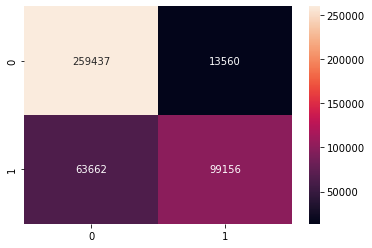

In [37]:
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

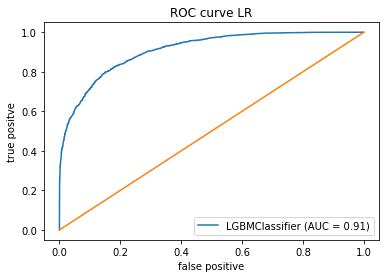

In [38]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

# XGBClassifier

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', eval_metric = "auc")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [57]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc'}

In [53]:
y_xgb = xgb.predict(X_test)


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.88      0.94      0.91    272997
succès (Class 1)       0.89      0.79      0.84    162818

        accuracy                           0.88    435815
       macro avg       0.89      0.87      0.87    435815
    weighted avg       0.89      0.88      0.88    435815



<AxesSubplot:>

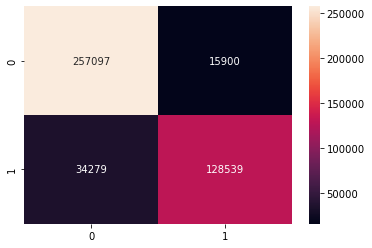

In [56]:
cm = confusion_matrix(y_test,xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d") 

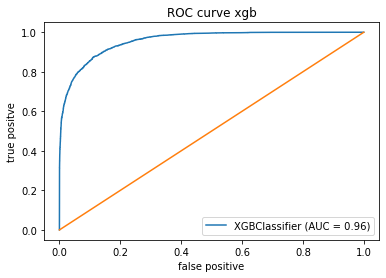

In [42]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve xgb')
plt.show()

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [67]:
parameters = {
    'max_depth': range (2, 10, 1)
#    'n_estimators': range(60, 220, 40),
#    'learning_rate': [0.1, 0.01, 0.05]
}

In [68]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [69]:
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 11.0min
[Parallel(n_jobs=10)]: Done  80 out of  80 | elapsed: 50.0min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [70]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [74]:
df_grid = pd.DataFrame(grid_search.cv_results_)

In [71]:
train_predictions = grid_search.predict(X_train)

In [72]:
 test_predictions = grid_search.predict(X_test)

In [77]:
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)

In [75]:
unseen_predictions = grid_search.predict(df_grid.iloc[:,1:])

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields param_max_depth, params

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb, target_names = ['échec(Class 0)','succès (Class 1)']))

# AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_adb = adb.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_adb, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.65      0.94      0.77    272997
succès (Class 1)       0.63      0.17      0.26    162818

        accuracy                           0.65    435815
       macro avg       0.64      0.55      0.52    435815
    weighted avg       0.65      0.65      0.58    435815



<AxesSubplot:>

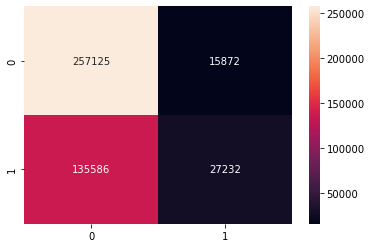

In [45]:
cm = confusion_matrix(y_test,adb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d") 

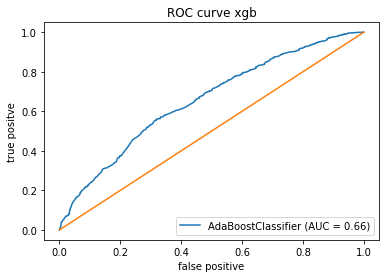

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve xgb')
plt.show()

# GradientBoostingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
y_gbc = gbc.predict(X_test)

0.6890095315891642


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbc, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.68      0.94      0.79    272997
succès (Class 1)       0.74      0.26      0.39    162818

        accuracy                           0.69    435815
       macro avg       0.71      0.60      0.59    435815
    weighted avg       0.70      0.69      0.64    435815



<AxesSubplot:>

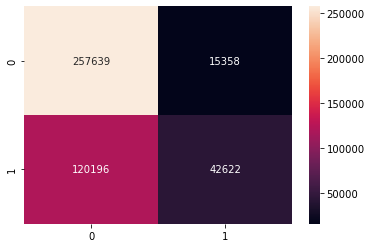

In [49]:
cm = confusion_matrix(y_test,gbc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

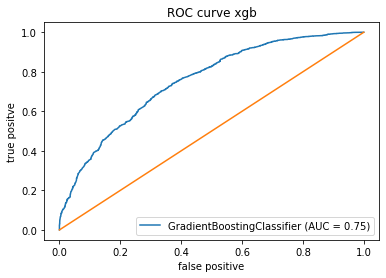

In [50]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve xgb')
plt.show()